In [53]:
from calitp.tables import tbl
from calitp import query_sql
from siuba import *

import datetime as dt
SELECTED_DATE = dt.date(2022, 2, 8)

table = query_sql(
    '''
    with lat_long as (
        SELECT 
            calitp_itp_id,
            calitp_url_number,
            calitp_extracted_at,
            shape_id,
            CAST(shape_pt_sequence AS INT64) as shape_pt_sequence,
            calitp_deleted_at,
        
        ST_GEOGPOINT(CAST(shape_pt_lon AS FLOAT64), CAST(shape_pt_lat AS FLOAT64)) as pt_geom
        FROM `cal-itp-data-infra.gtfs_schedule_type2.shapes`
        WHERE
            calitp_itp_id = 290 AND calitp_extracted_at <= '2022-02-08'
            AND calitp_deleted_at > '2022-02-08'
            AND shape_id = 'SamTrans80:3980273'
        LIMIT 10000
    )

    SELECT 
        calitp_itp_id,
        calitp_url_number,
        shape_id,
        calitp_extracted_at,
        ST_MAKELINE(ARRAY_AGG(pt_geom ORDER BY shape_pt_sequence)) as line_geom
    FROM lat_long
    GROUP BY 
        calitp_itp_id,
        calitp_url_number,
        calitp_extracted_at,
        shape_id
    '''
)

In [54]:
table

,calitp_itp_id,calitp_url_number,shape_id,calitp_extracted_at,line_geom
0,290,1,SamTrans80:3980273,2022-01-31,"MULTILINESTRING((-122.396782 37.795809, -122.3..."


In [55]:
type(table['line_geom'].iloc[0])

str

In [56]:
# table['line_geom'].iloc[0]

In [57]:
import shapely

In [58]:
geo = shapely.wkt.loads(table.line_geom.iloc[0])

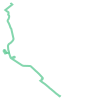

In [59]:
geo

In [60]:
len(geo.geoms)

3

In [64]:
import utils

E0315 21:35:41.972054040    1011 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies
E0315 21:35:44.666503189    1011 fork_posix.cc:70]           Fork support is only compatible with the epoll1 and poll polling strategies


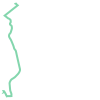

In [73]:
geo.geoms[0]

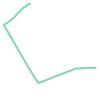

In [62]:
geo.geoms[1].ipynb_checkpoints/

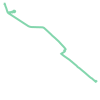

In [63]:
geo.geoms[2]

In [109]:
import geopandas as gpd
import shared_utils
gdf = gpd.GeoDataFrame({'shape': [table.shape_id.iloc[0]], 'geometry': [geo.geoms[0]]}, crs = shared_utils.geography_utils.WGS84)
utils.map_line(gdf)

In [74]:
t1 = geo.geoms[0]

In [89]:
t1.coords

In [90]:
multicoords = [list(line.coords) for line in geo.geoms]

In [95]:
one = shapely.geometry.linestring.LineString([item for sublist in multicoords  for item in sublist])

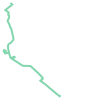

In [96]:
one

In [97]:
type(one)

shapely.geometry.linestring.LineString

In [98]:
gdf = gpd.GeoDataFrame({'shape': [table.shape_id.iloc[0]], 'geometry': [one]}, crs = shared_utils.geography_utils.WGS84)
utils.map_line(gdf)

In [99]:
import os
os.environ["CALITP_BQ_MAX_BYTES"] = str(400_000_000_000)

from calitp.tables import tbl
from calitp import query_sql
import calitp.magics
import branca

import shared_utils
import utils

from siuba import *
import pandas as pd
import geopandas as gpd
import shapely

import datetime as dt

import rt_analysis as rt
import importlib

from tqdm import tqdm_notebook
from tqdm.notebook import trange, tqdm

In [100]:
analysis_date = dt.date(2022, 2, 8)

In [101]:
samtrans_itp_id = 290

In [102]:
importlib.reload(utils)
importlib.reload(rt)

<module 'rt_analysis' from '/home/jovyan/data-analyses/rt_delay/rt_analysis.py'>

In [103]:
pbar = tqdm()

0it [00:00, ?it/s]

In [104]:
sam = rt.OperatorDayAnalysis(samtrans_itp_id, analysis_date, pbar)

found parquet
found parquet
found parquet
found parquet
found_parquet
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle positions gdf must not be empty
vehicle po

/opt/conda/lib/python3.9/site-packages/siuba/sql/utils.py:52: SAWarning: Dialect bigquery:bigquery will not make use of SQL compilation caching as it does not set the 'supports_statement_cache' attribute to ``True``.  This can have significant performance implications including some performance degradations in comparison to prior SQLAlchemy versions.  Dialect maintainers should seek to set this attribute to True after appropriate development and testing for SQLAlchemy 1.4 caching support.   Alternatively, this attribute may be set to False which will disable this warning. (Background on this error at: https://sqlalche.me/e/14/cprf)


In [105]:
ex = sam.position_interpolators['11454049-137-Blocks-Weekday-14']['rt']

In [106]:
ex.detailed_speed_map()

/home/jovyan/data-analyses/rt_delay/rt_analysis.py:109: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

